<a href="https://colab.research.google.com/github/laaraff/Entrega_Practica3/blob/main/Prueba_serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio del power de Rocio del 31/10:**

Calcular el promedio de temperatura anual (promedio de los 12 meses del
año) y graficar la serie resultante con lineas y puntos. Además agregar la
linea de tendencia lineal.

In [1]:
library(ggplot2)
library(lubridate)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
install.packages("ncdf4")
library(ncdf4)

In [4]:
datos <- nc_open(filename= "/content/air.mon.mean.nc")

In [6]:
install.packages("metR")
library(metR)
#suele tardar unos diez minutos en cargar. why?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘s2’, ‘sf’




In [7]:
install.packages(c("PCICt"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
datos_OCBA<- ReadNetCDF(datos, vars = "air",
subset = list(lat =-34,
lon = 360-58)) #Ya abro con la lat lon de OCBA
# Me quedo con el periodo 1990-2010
datos_OCBA_periodo<- datos_OCBA[which(year(datos_OCBA$time) %in% 1990:2010),]
#Es un data frame
head(datos_OCBA_periodo)




time,lat,lon,air
<dttm>,<dbl>,<dbl>,<dbl>
1990-01-01,-35,302.5,25.16322
1990-02-01,-35,302.5,22.96536
1990-03-01,-35,302.5,20.22968
1990-04-01,-35,302.5,17.70034
1990-05-01,-35,302.5,13.50871
1990-06-01,-35,302.5,10.44367


In [10]:
#Ahora tengo que hacer el promedio por año
promedios <- c()
j=1
for (i in 1990:2010) {
  datos2 <- datos_OCBA_periodo$air[year(datos_OCBA_periodo$time)==i]
  promedios[j] <- mean(datos2)
  j= j+1
}

In [ ]:
length(promedios)
2010-1990+1

[1] 21

[1] 21

In [11]:
#Armo un nuevo data frame con los promedios por año y el año
anios <- c(1990:2010)
datos1 <- data.frame("Anios"= anios, "Promedio" = promedios)
datos1

Anios,Promedio
<int>,<dbl>
1990,17.34575
1991,17.17262
1992,16.84620
1993,16.89575
1994,17.38829
1995,16.74114
1996,17.38189
1997,17.93311
1998,17.56225


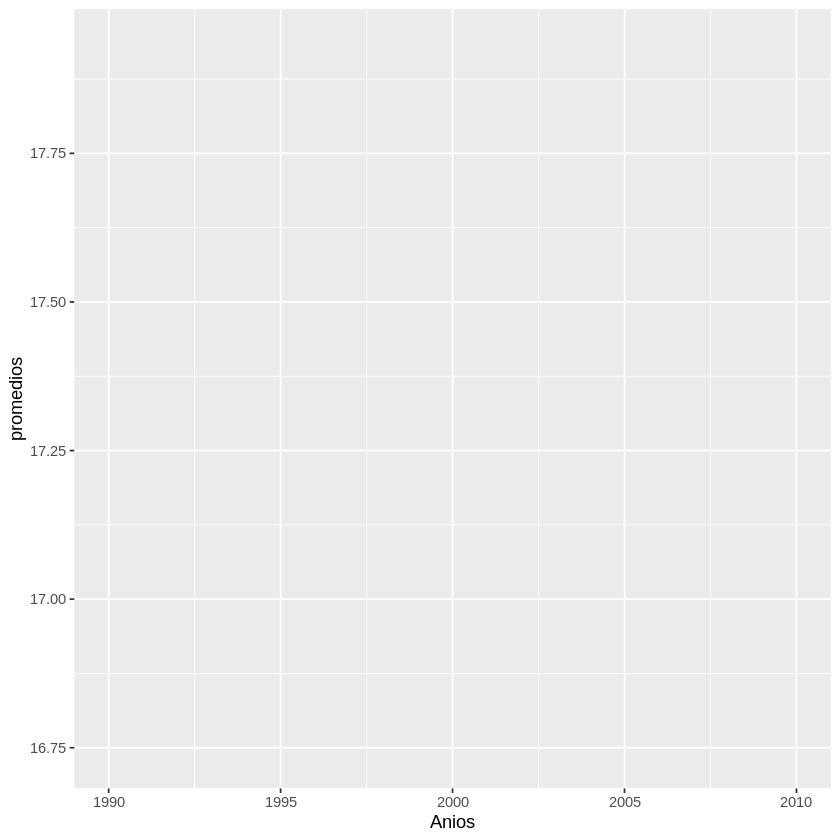

In [12]:
#Armo la serie temporal
# Primera capa
grafico <- ggplot(data = datos1, mapping = aes(x= Anios, y= promedios))
grafico

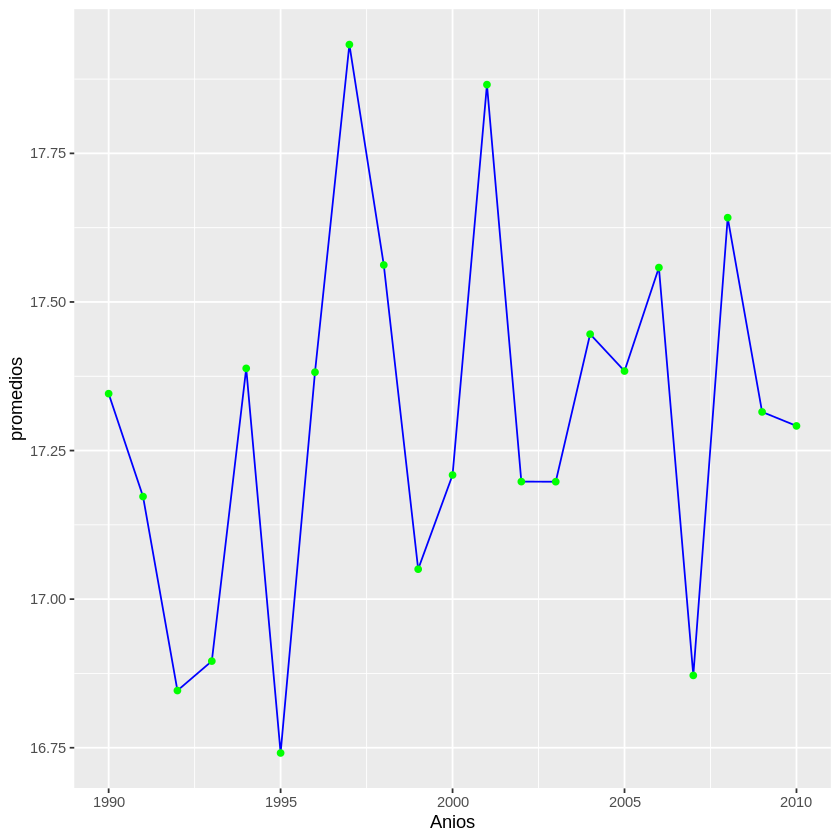

In [13]:
#grafico las lineas y puntos
grafico<- grafico + geom_line(color= "blue")
grafico <- grafico + geom_point(color= "green")
grafico

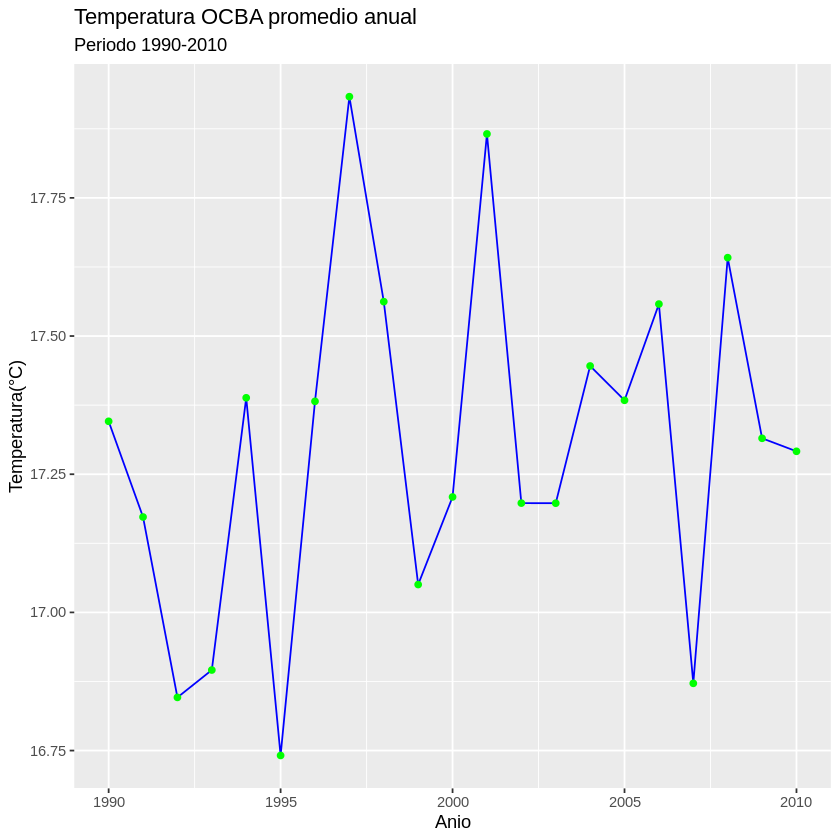

In [14]:
grafico <- grafico + labs(title = "Temperatura OCBA promedio anual", subtitle = "Periodo 1990-2010",
x = "Anio",
y = "Temperatura(°C)" )
grafico

`geom_smooth()` using formula = 'y ~ x'


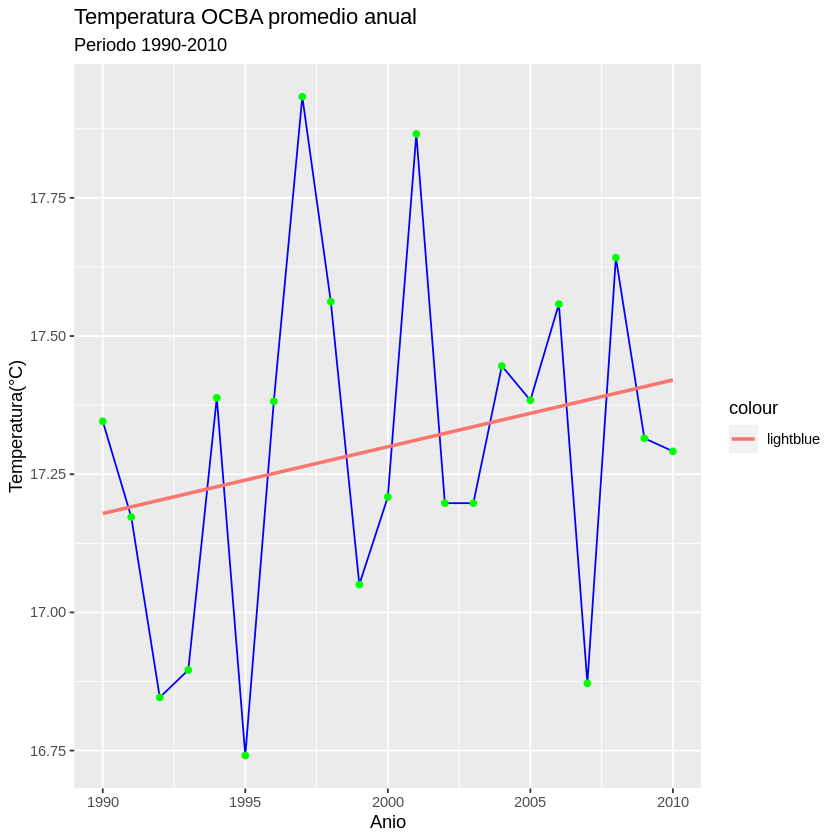

In [15]:
#Agregar tendencia lineal
grafico <- grafico + geom_smooth(method = "lm", se = FALSE, aes(color = "Tendencia lineal"))
grafico

In [ ]:
#funcion unique se queda con los valores de un vector pero sin repetir
